In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"D:\Amarjeet Admission\2 Year\4th semester\Edunet IBM SKILL BUILD AI ML\Employee salary prediction\adult 3.csv")

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.tail(3)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.shape

(48842, 15)

In [7]:
#null values
data.isna().sum() #mean median mode arbitrary

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data Preprocessing


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46226 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46226 non-null  int64 
 1   workclass        46226 non-null  object
 2   fnlwgt           46226 non-null  int64 
 3   education        46226 non-null  object
 4   educational-num  46226 non-null  int64 
 5   marital-status   46226 non-null  object
 6   occupation       46226 non-null  object
 7   relationship     46226 non-null  object
 8   race             46226 non-null  object
 9   gender           46226 non-null  object
 10  capital-gain     46226 non-null  int64 
 11  capital-loss     46226 non-null  int64 
 12  hours-per-week   46226 non-null  int64 
 13  native-country   46226 non-null  object
 14  income           46226 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Work class section

In [38]:
print(data.workclass.value_counts())

workclass
Private             32003
Self-emp-not-inc     3622
Local-gov            3042
Others               2576
State-gov            1932
Self-emp-inc         1657
Federal-gov          1394
Name: count, dtype: int64


In [39]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             32003
Self-emp-not-inc     3622
Local-gov            3042
Others               2576
State-gov            1932
Self-emp-inc         1657
Federal-gov          1394
Name: count, dtype: int64


C:\Users\aksha\AppData\Local\Temp\ipykernel_22456\4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [40]:
# drop the column Without-pay and neverworked
data.drop(data[data['workclass'] == 'Without-pay'].index, inplace=True)
data.drop(data[data['workclass'] == 'Never-worked'].index, inplace=True)

print(data['workclass'].value_counts())

workclass
Private             32003
Self-emp-not-inc     3622
Local-gov            3042
Others               2576
State-gov            1932
Self-emp-inc         1657
Federal-gov          1394
Name: count, dtype: int64


fnlwgt section

In [41]:
print(data.fnlwgt.value_counts())

fnlwgt
203488    21
120277    19
126569    18
99185     17
125892    17
          ..
285290     1
293579     1
256522     1
114874     1
257302     1
Name: count, Length: 27212, dtype: int64


Education section

In [42]:
print(data.education.value_counts())

education
HS-grad         15462
Some-college    10726
Bachelors        7908
Masters          2630
Assoc-voc        2034
11th             1766
Assoc-acdm       1573
10th             1356
Prof-school       827
9th               727
12th              638
Doctorate         579
Name: count, dtype: int64


In [43]:
# drop the column Preschool,1st-4th,5th-6th,7th-8th from education
data.drop(data[data['education'] == 'Preschool'].index, inplace=True)
data.drop(data[data['education'] == '1st-4th'].index, inplace=True)
data.drop(data[data['education'] == '5th-6th'].index, inplace=True)
data.drop(data[data['education'] == '7th-8th'].index, inplace=True)
print(data['education'].value_counts())

education
HS-grad         15462
Some-college    10726
Bachelors        7908
Masters          2630
Assoc-voc        2034
11th             1766
Assoc-acdm       1573
10th             1356
Prof-school       827
9th               727
12th              638
Doctorate         579
Name: count, dtype: int64


educational-num section

In [44]:
print(data['educational-num'].value_counts())

educational-num
9     15462
10    10726
13     7908
14     2630
11     2034
7      1766
12     1573
6      1356
15      827
5       727
8       638
16      579
Name: count, dtype: int64


In [45]:
# drop 1,2,3,4 from educational-num
data.drop(data[data['educational-num'] == 1].index, inplace=True)
data.drop(data[data['educational-num'] == 2].index, inplace=True)
data.drop(data[data['educational-num'] == 3].index, inplace=True)
data.drop(data[data['educational-num'] == 4].index, inplace=True)
print(data['educational-num'].value_counts())

educational-num
9     15462
10    10726
13     7908
14     2630
11     2034
7      1766
12     1573
6      1356
15      827
5       727
8       638
16      579
Name: count, dtype: int64


In [46]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse    21369
Never-married         15642
Divorced               6442
Separated              1429
Widowed                1344
Name: count, dtype: int64


In [47]:
#drop the column married-AF-spouse, married-spouse-absent
data.drop(data[data['marital-status'] == 'Married-AF-spouse'].index, inplace=True)
data.drop(data[data['marital-status'] == 'Married-spouse-absent'].index, inplace=True)
print(data['marital-status'].value_counts())


marital-status
Married-civ-spouse    21369
Never-married         15642
Divorced               6442
Separated              1429
Widowed                1344
Name: count, dtype: int64


Occupation section

In [48]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6085
Exec-managerial      5989
Craft-repair         5764
Adm-clerical         5484
Sales                5377
Other-service        4515
Machine-op-inspct    2719
Others               2576
Transport-moving     2186
Handlers-cleaners    1886
Tech-support         1430
Farming-fishing      1253
Protective-serv       962
Name: count, dtype: int64


In [49]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6085
Exec-managerial      5989
Craft-repair         5764
Adm-clerical         5484
Sales                5377
Other-service        4515
Machine-op-inspct    2719
Others               2576
Transport-moving     2186
Handlers-cleaners    1886
Tech-support         1430
Farming-fishing      1253
Protective-serv       962
Name: count, dtype: int64


C:\Users\aksha\AppData\Local\Temp\ipykernel_22456\1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [50]:
# drop the Priv-house-serv,Armed-Forces from occupation
data.drop(data[data['occupation'] == 'Priv-house-serv'].index, inplace=True)
data.drop(data[data['occupation'] == 'Armed-Forces'].index, inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6085
Exec-managerial      5989
Craft-repair         5764
Adm-clerical         5484
Sales                5377
Other-service        4515
Machine-op-inspct    2719
Others               2576
Transport-moving     2186
Handlers-cleaners    1886
Tech-support         1430
Farming-fishing      1253
Protective-serv       962
Name: count, dtype: int64


relationship Section

In [51]:
print(data['relationship'].value_counts())

relationship
Husband           18814
Not-in-family     11791
Own-child          7371
Unmarried          4713
Wife               2232
Other-relative     1305
Name: count, dtype: int64


race Section

In [52]:
print(data['race'].value_counts())

race
White                 39676
Black                  4386
Asian-Pac-Islander     1394
Amer-Indian-Eskimo      441
Other                   329
Name: count, dtype: int64


Gender Section

In [53]:
print(data['gender'].value_counts())

gender
Male      30974
Female    15252
Name: count, dtype: int64


Captial gain

In [54]:
print(data['capital-gain'].value_counts())

capital-gain
0        42336
15024      513
7688       406
7298       357
99999      241
         ...  
2062         1
1639         1
7262         1
7978         1
2387         1
Name: count, Length: 122, dtype: int64


hours-per-week 

In [55]:
print(data['hours-per-week'].value_counts())

hours-per-week
40    21513
50     4111
45     2625
60     2103
35     1811
      ...  
97        2
94        1
82        1
87        1
79        1
Name: count, Length: 95, dtype: int64


Native-Country section

In [56]:
print(data['native-country'].value_counts())

native-country
United-States                 42256
?                               766
Mexico                          486
Philippines                     260
Germany                         199
Canada                          172
Puerto-Rico                     152
India                           135
England                         121
Cuba                            114
South                           109
China                           105
Jamaica                          94
El-Salvador                      92
Japan                            89
Italy                            81
Vietnam                          77
Poland                           71
Columbia                         70
Dominican-Republic               66
Taiwan                           62
Haiti                            59
Iran                             58
Portugal                         46
Guatemala                        45
Greece                           45
Nicaragua                        41
Peru         

In [63]:

# replace the ? with Others-country in native-country column
data['native-country'].replace({'?': 'Others-country'}, inplace=True)  # fixed column access
print(data['native-country'].value_counts())


native-country
United-States                 42256
Others-country                  766
Mexico                          486
Philippines                     260
Germany                         199
Canada                          172
Puerto-Rico                     152
India                           135
England                         121
Cuba                            114
South                           109
China                           105
Jamaica                          94
El-Salvador                      92
Japan                            89
Italy                            81
Vietnam                          77
Poland                           71
Columbia                         70
Dominican-Republic               66
Taiwan                           62
Haiti                            59
Iran                             58
Portugal                         46
Guatemala                        45
Greece                           45
Nicaragua                        41
Peru         

C:\Users\aksha\AppData\Local\Temp\ipykernel_22456\3129171444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace({'?': 'Others-country'}, inplace=True)  # fixed column access


income section

In [64]:
print(data['income'].value_counts())

income
<=50K    34718
>50K     11508
Name: count, dtype: int64


Outliers handling

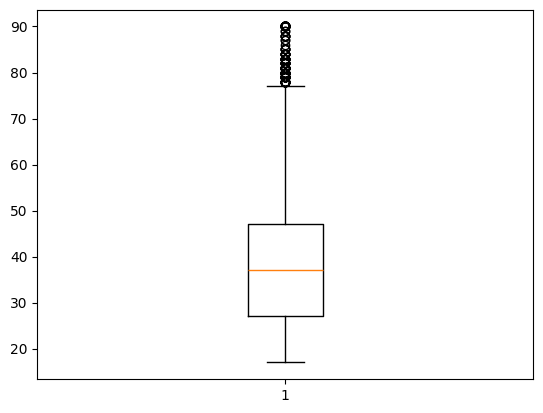

In [65]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

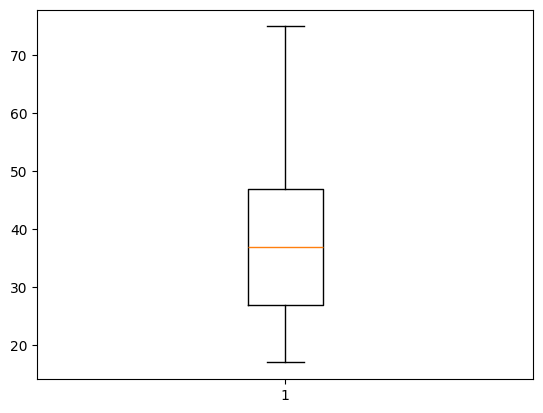

In [66]:
data=data[(data['age']<=75)&(data['age']>=17)]

plt.boxplot(data['age'])
plt.show()

In [67]:
data.shape

(45937, 15)

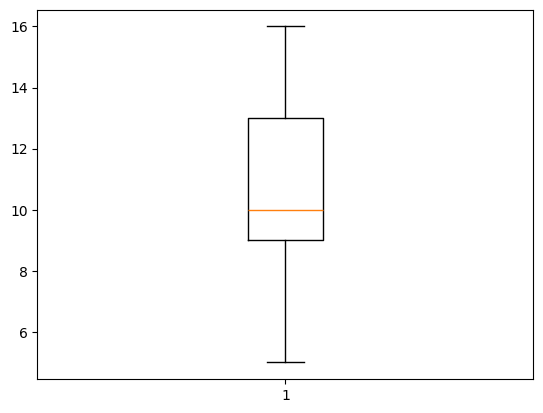

In [68]:
plt.boxplot(data['educational-num'])
plt.show()

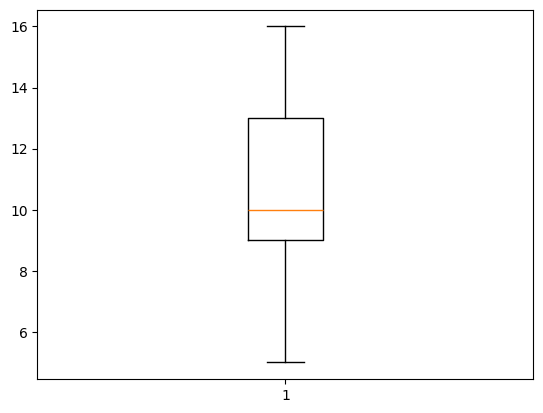

In [69]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

plt.boxplot(data['educational-num'])
plt.show()

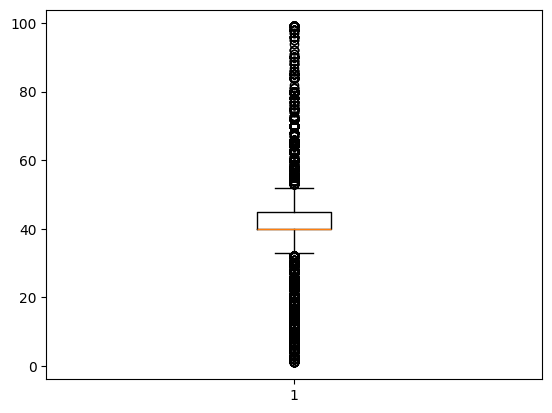

In [70]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [71]:
data=data.drop(columns=['education']) #redundant features removal
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Label Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])  
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,2,5,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,1,3,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,1,9,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,1,5,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,2,7,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,1,11,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,1,5,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,4,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,2,0,3,4,1,0,0,20,39,<=50K


In [74]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,2,5,3,2,1,0,0,40,39
1,38,3,89814,9,1,3,0,4,1,0,0,50,39
2,28,1,336951,12,1,9,0,4,1,0,0,40,39
3,44,3,160323,10,1,5,0,2,1,7688,0,40,39
4,18,2,103497,10,2,7,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,1,11,5,4,0,0,0,38,39
48838,40,3,154374,9,1,5,0,4,1,0,0,40,39
48839,58,3,151910,9,4,0,4,4,0,0,0,40,39
48840,22,3,201490,9,2,0,3,4,1,0,0,20,39


In [75]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45937, dtype: object

# training and testing data

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8173
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.88      6872
        >50K       0.72      0.45      0.56      2316

    accuracy                           0.82      9188
   macro avg       0.78      0.70      0.72      9188
weighted avg       0.81      0.82      0.80      9188

RandomForest Accuracy: 0.8523
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6872
        >50K       0.74      0.64      0.69      2316

    accuracy                           0.85      9188
   macro avg       0.81      0.78      0.80      9188
weighted avg       0.85      0.85      0.85      9188

KNN Accuracy: 0.8211
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6872
        >50K       0.66      0.59      0.63      2316

    accuracy                           0.82      9188
   macro avg       0.76      0.75      0.

# Comparing Models


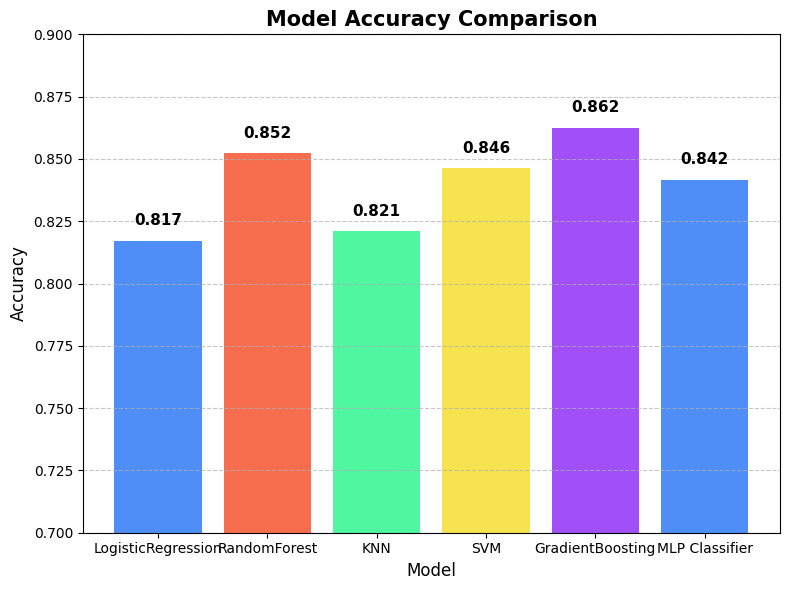

In [81]:
# Vertical bar chart comparison of model
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = plt.bar(list(results.keys()), list(results.values()), color=['#4F8EF7', '#F76E4F', '#4FF7A1', '#F7E34F', '#A14FF7'])
plt.ylim(0.7, 0.9)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=15, fontweight='bold')

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{bar.get_height():.3f}", 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Saving the best model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.8040
RandomForest: 0.8531
KNN: 0.7714
SVM: 0.7877
GradientBoosting: 0.8622

✅ Best model: GradientBoosting with accuracy 0.8622
✅ Saved best model as best_model.pkl
